# Part A : Data Preprocessing

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import dataset
dataset= pd.read_csv('Social_Ads.csv')

In [3]:
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
# Create feature matrix X and dependent variable vector Y
X= dataset.iloc[:,:-1].values
Y= dataset.iloc[:,-1].values

In [5]:
# Replacing missing data
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(missing_values=np.nan, strategy='mean')
X= imputer.fit_transform(X)

In [6]:
# Encoding not required

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X= sc.fit_transform(X)

In [8]:
# Spliting the dataset into training and testing
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest= train_test_split(X,Y,test_size=0.2,random_state=1)

# Part B : Building KNN Classification Model

In [9]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
kc= KNeighborsClassifier(n_neighbors=5,weights='uniform',p=2)
kc.fit(Xtrain,Ytrain)

KNeighborsClassifier()

In [10]:
# Testing the model
Yestimated= kc.predict(Xtest)

In [11]:
# Performance metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
cm= confusion_matrix(Ytest,Yestimated)
print('Confusion matrix : ')
print(cm)
ac= accuracy_score(Ytest,Yestimated)
ps= precision_score(Ytest,Yestimated)
print('Accuracy score: ',ac)
print('Precision score: ',ps)

Confusion matrix : 
[[40  8]
 [ 3 29]]
Accuracy score:  0.8625
Precision score:  0.7837837837837838


In [12]:
error_rate=[]
for i in range(1,30):
    kc= KNeighborsClassifier(n_neighbors=i)
    kc.fit(Xtrain,Ytrain)
    Ypred_i=kc.predict(Xtest)
    error_rate.append(np.mean(Ypred_i!=Ytest))

Text(0, 0.5, 'Error Rate')

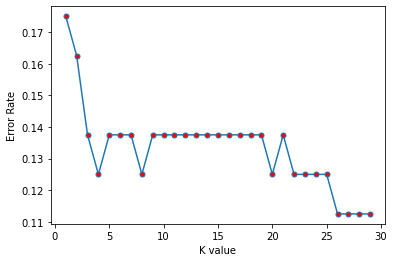

In [13]:
plt.plot(range(1,30),error_rate,marker='o',markerfacecolor='red',markersize=5)
plt.xlabel('K value')
plt.ylabel('Error Rate')

In [14]:
acc_rate=[]
for i in range(1,30):
    kc= KNeighborsClassifier(n_neighbors=i)
    kc.fit(Xtrain,Ytrain)
    Ypred_i=kc.predict(Xtest)
    acc_rate.append(accuracy_score(Ytest,Ypred_i))

Text(0, 0.5, 'Accuracy Rate')

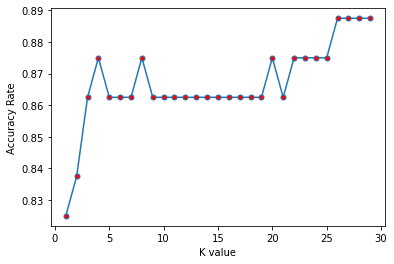

In [15]:
plt.plot(range(1,30),acc_rate,marker='o',markerfacecolor='red',markersize=5)
plt.xlabel('K value')
plt.ylabel('Accuracy Rate')